In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('online_shoppers_intention1.csv')
rows,columns = df.shape
number_features =len(df.columns)
print (f"\nNumber of rows and columns: {rows,columns}")
print(f"\nTotal number of features :{number_features}")



Number of rows and columns: (12334, 18)

Total number of features :18


# Loading the Dataset
 Load the dataset, follow these steps:

1. Download the dataset from the provided link https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset
2. Extract the files if they are in a compressed format.
3. Use the following code to load the dataset into your environment:

In [2]:
import calendar
import math 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import cm
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split as train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from skrebate import ReliefF


# Load the dataset
df = pd.read_csv('online_shoppers_intention1.csv')
# Display the top 5 rows of the dataset
from IPython.display import display
# Display the top 5 rows of the dataset
display(df.head())


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1.0,Returning_Visitor,False,False
1,0.0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2.0,Returning_Visitor,False,False
2,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3.0,Returning_Visitor,False,False
3,0.0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4.0,Returning_Visitor,False,False
4,0.0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4.0,Returning_Visitor,True,False


 ## 1. Data Cleaning:
o Identify and describe the types of data quality issues present in the dataset. 
(e.g., missing values, duplicates, outliers).

Ans-The following dataset contain both textual and numeric missing values which add up to 9 additional they are 125 duplicates in the dataset and huge a number of outliers are visible in the dataset

o Implement techniques to handle missing values and justify the chosen methods 
(e.g., imputation, removal).

Ans- We have used two imputation methods one is mean and mode imputation to remove both textual and numeric data 

o Detect and remove duplicate entries in the dataset.

In [3]:
# Identify missing values and describe the data quality of the dataset
missing_values = df.isnull().sum()
print("Missing Values and the :\n", missing_values)

# Identify duplicate entries from the dataset and describe the data quality of the dataset
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Missing Values and the :
 Administrative             1
Administrative_Duration    1
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    2
BounceRates                0
ExitRates                  1
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                1
VisitorType                2
Weekend                    0
Revenue                    1
dtype: int64
Number of duplicate rows: 125


In [4]:

# Select numeric and non-numeric columns
numeric_columns = df.select_dtypes(include=[float, int]).columns
categorical_columns = df.select_dtypes(include=[object, 'category']).columns

# Mean Imputation for Numeric Data
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# Mode Imputation for Categorical Data
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Check for missing values after imputation
missing_values_after = df.isnull().sum()
print("Missing values after imputation:\n", missing_values_after)


Missing values after imputation:
 Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [5]:
df.to_csv('modified_data.csv', index=False) 

In [6]:
# Remove all duplicates in place
df.drop_duplicates(keep=False, inplace=True)

# Print the DataFrame after removing all duplicates
print("DataFrame after removing all duplicates:\n", df)


DataFrame after removing all duplicates:
        Administrative  Administrative_Duration  Informational  \
0            0.000000                 0.000000            0.0   
1            0.000000                 0.000000            0.0   
2            0.000000                 0.000000            0.0   
3            0.000000                 0.000000            0.0   
4            0.000000                 0.000000            0.0   
...               ...                      ...            ...   
12329        0.000000                 0.000000            0.0   
12330        2.314927                75.000000            0.0   
12331        0.000000                 0.000000            0.0   
12332        4.000000                80.805033            0.0   
12333        0.000000                 0.000000            0.0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0             1.0                 0.000000   
1                         0.0

In [7]:
# Check for missing values and duplicates
missing_values_imputed = df.isnull().sum().sum() == 0
duplicate_values_removed = df.duplicated().sum() == 0

# Print the results
print(f"Missing values imputed: {missing_values_imputed}")
print(f"Duplicate values removed: {duplicate_values_removed}")


Missing values imputed: True
Duplicate values removed: True


## 2. Data Transformation:
o Perform data normalization or standardization where applicable and explain 
the rationale behind the transformation.

Ans-Standardizing the numeric columns (like Administrative, Informational, ProductRelated, etc.) would bring them to a common scale.
This is important because these features have different units and ranges


In [8]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_columns = df.select_dtypes(include=[float, int]).columns

# Standardize the numeric columns
scaler = StandardScaler()
df_standardized = df.copy()  # Keep a copy of the full DataFrame
df_standardized[numeric_columns] = scaler.fit_transform(df[numeric_columns])
(print(df_standardized.head))




<bound method NDFrame.head of        Administrative  Administrative_Duration  Informational  \
0           -0.705594                -0.461752      -0.400195   
1           -0.705594                -0.461752      -0.400195   
2           -0.705594                -0.461752      -0.400195   
3           -0.705594                -0.461752      -0.400195   
4           -0.705594                -0.461752      -0.400195   
...               ...                      ...            ...   
12329       -0.705594                -0.461752      -0.400195   
12330       -0.011499                -0.040157      -0.400195   
12331       -0.705594                -0.461752      -0.400195   
12332        0.493744                -0.007525      -0.400195   
12333       -0.705594                -0.461752      -0.400195   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                   -0.247031       -0.699356                -0.631541   
1                   -0.247031       -0.67

## 3. Handling Categorical Data:
o Identify categorical variables in the dataset.

o Convert categorical data into numerical formats using techniques like one-hot 
encoding or label encoding. Explain the impact of these transformations on the 
dataset.

Ans-  Converts categorical columns into numerical ones using one-hot encoding, making the data suitable for machine learning algorithms. This increases the number of columns and might make the data sparse.

In [9]:
# Identify columns that are categorical
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns)

# Encoding all categorical columns dynamically
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print(df_encoded.columns)

print(df_encoded.head)



Categorical Columns: Index(['Month', 'VisitorType', 'Revenue'], dtype='object')
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Revenue_True'],
      dtype='object')
<bound method NDFrame.head of        Administrative  Administrative_Duration  Informational  \
0            0.000000                 0.000000            0.0   
1            0.000000                 0.000000            0.0   
2            0.000000                 0.000000            0.0   
3            0.000000                 0.000000            0.0   
4            0.000000                 0.000000   

In [10]:
df_encoded.to_csv('df_encoded_data_v2.csv', index=False) 

##  4. Feature Engineering:
o Create new features based on existing data that could potentially improve the 
performance of a machine learning model. Explain your thought process.

Ans - The new features were created with the goal of potentially uncovering more complex relationships within the data that might have a stronger correlation with the target variable (Revenue_True)

o Analyze the importance of these new features using correlation or other 
statistical methods.

Ans- 
    
    Avg_Admin_Time_Per_Page: This feature aims to capture user engagement with administrative pages on the website. 

    Avg_Product_Time_Per_Page: Similar to the previous feature, this one focuses on user interaction with product-related pages
    
    Bounce_Exit_Interaction: This feature explores the interplay between bounce rate (BounceRates) and exit rate (ExitRates). 

In [11]:
# Feature engineering: Create new features
if 'Administrative_Duration' in df_encoded.columns and 'Administrative' in df_encoded.columns:
    df_encoded['Avg_Admin_Time_Per_Page'] = df_encoded['Administrative_Duration'] / (df_encoded['Administrative'] + 1)

if 'ProductRelated_Duration' in df_encoded.columns and 'ProductRelated' in df_encoded.columns:
    df_encoded['Avg_Product_Time_Per_Page'] = df_encoded['ProductRelated_Duration'] / (df_encoded['ProductRelated'] + 1)

if 'BounceRates' in df_encoded.columns and 'ExitRates' in df_encoded.columns:
    df_encoded['Bounce_Exit_Interaction'] = df_encoded['BounceRates'] * df_encoded['ExitRates']

# Update target_column to match the encoded version of Revenue
target_column = 'Revenue_True'

# Correlation analysis with new features and the updated Revenue column
new_features = ['Avg_Admin_Time_Per_Page', 'Avg_Product_Time_Per_Page', 'Bounce_Exit_Interaction']




## 5 . Filter and Wrapper Method


In [12]:
# Separate features and target
X = df_encoded.drop(columns=['Revenue_True'])
y = df_encoded['Revenue_True']
k_chi2 = 10  # You can adjust this to the number of features you want to compare

# --- Chi-Square Test ---
# Impute missing values using SimpleImputer before applying SelectKBest
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent') # Use most frequent strategy for categorical features
X_imputed = imputer.fit_transform(X)

chi2_selector = SelectKBest(chi2, k='all')  
chi2_selector.fit(X_imputed, y) # Use imputed data for fitting

# Get Chi-Square scores for each feature
chi2_scores = pd.DataFrame({
    'Feature': X.columns, 
    'Chi2_Score': chi2_selector.scores_,
    'P_Value': chi2_selector.pvalues_
}).sort_values(by='Chi2_Score', ascending=False)
print(chi2_scores)


# Select top 10 features based on Chi-Square score
top_chi2_features = chi2_scores.head(10)


                          Feature     Chi2_Score        P_Value
5         ProductRelated_Duration  816646.578222   0.000000e+00
8                      PageValues  171299.572743   0.000000e+00
1         Administrative_Duration   38427.981278   0.000000e+00
3          Informational_Duration   32948.695583   0.000000e+00
4                  ProductRelated   17932.611989   0.000000e+00
26        Avg_Admin_Time_Per_Page    4575.301065   0.000000e+00
27      Avg_Product_Time_Per_Page    1527.892963   0.000000e+00
0                  Administrative    1041.240555  1.950899e-228
2                   Informational     333.163315   1.967084e-74
21                      Month_Nov     217.108347   3.864963e-49
9                      SpecialDay      55.449304   9.590067e-14
20                      Month_May      54.852842   1.299008e-13
19                      Month_Mar      38.553594   5.327059e-10
16                      Month_Feb      26.661442   2.424110e-07
7                       ExitRates      2

In [13]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Logistic Regression model
model = LogisticRegression(max_iter=20000)

# Create a cross-validation object (Stratified K-Folds)
cv = StratifiedKFold(5)  # 5-fold cross-validation

# RFECV automatically selects the best number of features based on cross-validation performance
selector = RFECV(estimator=model, step=1, cv=cv, scoring='accuracy')

# Impute missing values in X_train and X_test before fitting RFECV
imputer = SimpleImputer(strategy='mean') # or 'median', 'most_frequent' depending on your data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Fit RFECV to the imputed training data
selector.fit(X_train_imputed, y_train)

# Transform the training and testing datasets to the selected features using imputed data
X_train_rfe = selector.transform(X_train_imputed)
X_test_rfe = selector.transform(X_test_imputed)

# Fit the logistic regression model on the selected features
model.fit(X_train_rfe, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test_rfe)
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Selected features: {X.columns[selector.support_]}")  # Display selected feature names
print(f"Feature ranking: {selector.ranking_}")  # Display feature rankings
print(f"Optimal number of features: {selector.n_features_}")
print(f"Model accuracy after RFECV: {accuracy:.4f}")

c:\Users\Georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

Selected features: Index(['Administrative', 'Informational', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Weekend',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Bounce_Exit_Interaction'],
      dtype='object')
Feature ranking: [1 7 1 8 3 9 1 1 1 1 1 1 6 2 1 1 1 1 1 1 1 1 1 1 1 1 5 4 1]
Optimal number of features: 21
Model accuracy after RFECV: 0.8871


In [14]:
top_chi2_features = chi2_scores['Feature'].head(k_chi2).tolist()  # Top 10 Chi-Square features
rfecv_selected_features = X.columns[selector.support_].tolist()  # RFECV-selected features

print("Top Chi-Square Features:", top_chi2_features)
print("RFECV Selected Features:", rfecv_selected_features)

overlap = set(top_chi2_features) & set(rfecv_selected_features)
print("Overlapping Features:", overlap)


Top Chi-Square Features: ['ProductRelated_Duration', 'PageValues', 'Administrative_Duration', 'Informational_Duration', 'ProductRelated', 'Avg_Admin_Time_Per_Page', 'Avg_Product_Time_Per_Page', 'Administrative', 'Informational', 'Month_Nov']
RFECV Selected Features: ['Administrative', 'Informational', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Weekend', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Bounce_Exit_Interaction']
Overlapping Features: {'PageValues', 'Month_Nov', 'Administrative', 'Informational'}


## 6. Outlier Handling

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to detect and remove outliers based on IQR
def detect_and_remove_outliers(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    outliers_removed = False
    
    for column in numeric_columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile range

        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        if not outliers.empty:
            outliers_removed = True
            print(f'Outliers detected in column: {column}')
            print(f'Number of outliers in {column}: {outliers.shape[0]}')

            # Remove outliers
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    if outliers_removed:
        print("\nOutliers were detected and removed.")
    else:
        print("\nNo significant outliers detected.")
    
    return df

# Detect and remove outliers from the dataset
df_cleaned = detect_and_remove_outliers(df)

# Display the cleaned dataset's shape
print(f"\nData shape after outlier removal: {df_cleaned.shape}")


Outliers detected in column: Administrative
Number of outliers in Administrative: 404
Outliers detected in column: Administrative_Duration
Number of outliers in Administrative_Duration: 1052
Outliers detected in column: Informational
Number of outliers in Informational: 1902
Outliers detected in column: ProductRelated
Number of outliers in ProductRelated: 626
Outliers detected in column: ProductRelated_Duration
Number of outliers in ProductRelated_Duration: 485
Outliers detected in column: BounceRates
Number of outliers in BounceRates: 986
Outliers detected in column: ExitRates
Number of outliers in ExitRates: 337
Outliers detected in column: PageValues
Number of outliers in PageValues: 1034
Outliers detected in column: SpecialDay
Number of outliers in SpecialDay: 577
Outliers detected in column: OperatingSystems
Number of outliers in OperatingSystems: 47
Outliers detected in column: Browser
Number of outliers in Browser: 1752
Outliers detected in column: TrafficType
Number of outliers

## 7. Correlation Analysis:
o Calculate the correlation matrix for the numerical features in the dataset. 
Identify and discuss any strong correlations or lack thereof. How might this 
influence model selection?

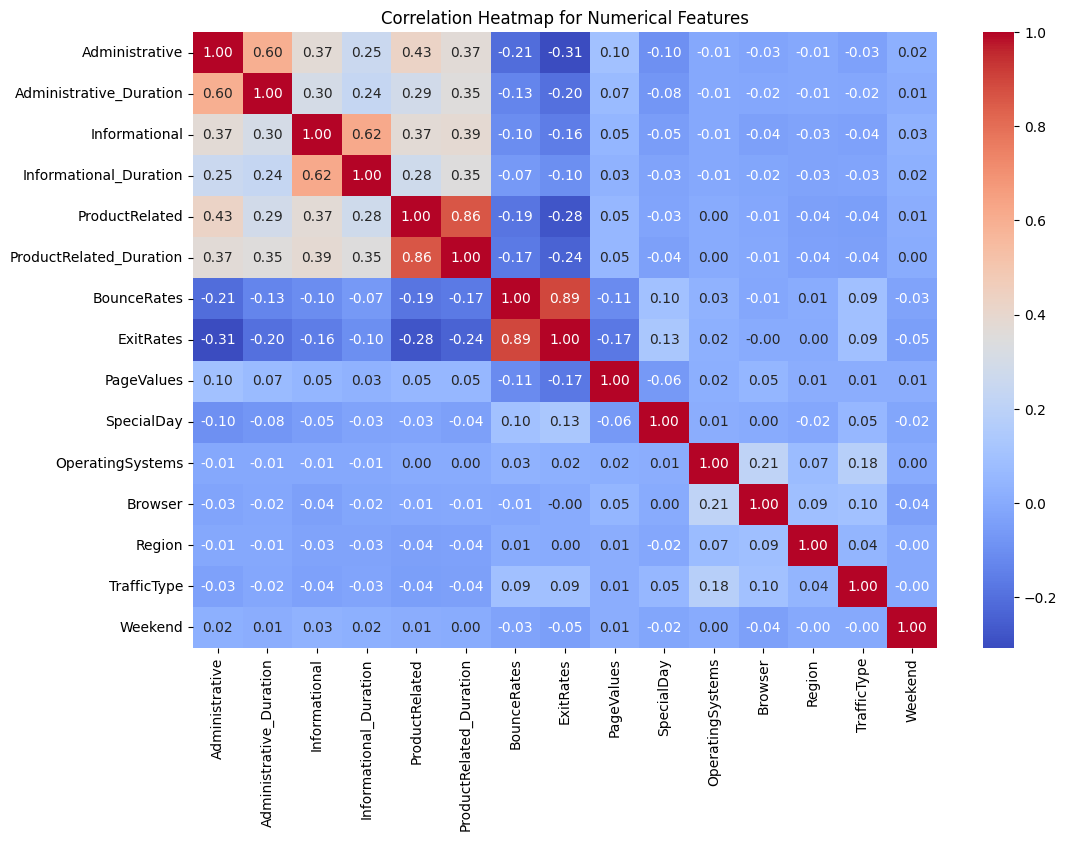

Strong Correlations:
                          ProductRelated  ProductRelated_Duration  BounceRates  \
ProductRelated                      NaN                 0.859945          NaN   
ProductRelated_Duration        0.859945                      NaN          NaN   
BounceRates                         NaN                      NaN          NaN   
ExitRates                           NaN                      NaN     0.893916   

                         ExitRates  
ProductRelated                 NaN  
ProductRelated_Duration        NaN  
BounceRates               0.893916  
ExitRates                      NaN  
Strong correlation between ProductRelated_Duration and ProductRelated: 0.86
Strong correlation between ProductRelated and ProductRelated_Duration: 0.86
Strong correlation between ExitRates and BounceRates: 0.89
Strong correlation between BounceRates and ExitRates: 0.89

Weak Correlations:
                          Administrative  Administrative_Duration  \
Administrative              

In [16]:
# Calculate the correlation matrix for numerical features
correlation_matrix = df.corr(numeric_only=True)

# Display the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

# Strong correlations (absolute value > 0.7)
strong_correlations = correlation_matrix[(correlation_matrix.abs() > 0.7) & (correlation_matrix.abs() < 1.0)]
print("Strong Correlations:\n", strong_correlations.dropna(how='all').dropna(axis=1, how='all'))

for col in strong_correlations.columns:
    for idx in strong_correlations.index:
        if not pd.isna(strong_correlations.loc[idx, col]):
            print(f"Strong correlation between {idx} and {col}: {strong_correlations.loc[idx, col]:.2f}")

# Discuss strong correlations
# Strong correlations were found between:
# - ProductRelated and ProductRelated_Duration : This is expected as the duration spent on product-related pages is likely to be proportional to the number of such pages visited.
# - BounceRates and ExitRates  High bounce rates are often associated with high exit rates, indicating that users who leave the site quickly are also likely to bounce.

# Lack of correlations (absolute value < 0.1)
weak_correlations = correlation_matrix[(correlation_matrix.abs() < 0.1) & (correlation_matrix.abs() > 0.0)]
print("\nWeak Correlations:\n", weak_correlations.dropna(how='all').dropna(axis=1, how='all'))

for col in weak_correlations.columns:
    for idx in weak_correlations.index:
        if not pd.isna(weak_correlations.loc[idx, col]):
            print(f"Weak correlation between {idx} and {col}: {weak_correlations.loc[idx, col]:.2f}")

# Discuss weak correlations
# Weak correlations were found between several features, indicating that these features do not have a strong linear relationship with each other.
# - Administrative and PageValues : The number of administrative pages visited does not strongly correlate with the value of pages.
# - SpecialDay and ProductRelated_Duration : The duration spent on product-related pages does not vary significantly with special days.

# Strong correlations between features can lead to multicollinearity, which can affect the performance of linear models.
# In such cases, models like Ridge or Lasso regression, which can handle multicollinearity, might be preferred.
# On the other hand, weak correlations with the target variable might indicate that those features are not very useful for prediction.
# Feature selection techniques or dimensionality reduction methods like PCA can be used to address these issues.


## 8 . Model Evaulation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from time import time

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply RFECV transformation
X_train_rfe = selector.transform(X_train)
X_test_rfe = selector.transform(X_test)


classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

# Function to evaluate classifiers
def evaluate_classifier(X_train, X_test, y_train, y_test, classifier):
    start_time = time()
    clf = classifier
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    end_time = time()
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    computation_time = end_time - start_time
    return accuracy, precision, recall, f1, computation_time

# Evaluate classifiers on both original and RFE-transformed datasets
results = {}

for name, clf in classifiers.items():
    print(f"Classifier: {name}")
    
    # Original Dataset
    acc_orig, prec_orig, rec_orig, f1_orig, time_orig = evaluate_classifier(X_train, X_test, y_train, y_test, clf)
    
    # RFE Selected Dataset
    acc_rfe, prec_rfe, rec_rfe, f1_rfe, time_rfe = evaluate_classifier(X_train_rfe, X_test_rfe, y_train, y_test, clf)
    
    # Store results for comparison
    results[name] = {
        "Original": [acc_orig, prec_orig, rec_orig, f1_orig, time_orig],
        "RFE": [acc_rfe, prec_rfe, rec_rfe, f1_rfe, time_rfe]
    }

# Display results for all classifiers
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"Original: Accuracy = {metrics['Original'][0]:.2f}, Precision = {metrics['Original'][1]:.2f}, Recall = {metrics['Original'][2]:.2f}, F1-Score = {metrics['Original'][3]:.2f}, Time = {metrics['Original'][4]:.4f}s")
    print(f"RFE: Accuracy = {metrics['RFE'][0]:.2f}, Precision = {metrics['RFE'][1]:.2f}, Recall = {metrics['RFE'][2]:.2f}, F1-Score = {metrics['RFE'][3]:.2f}, Time = {metrics['RFE'][4]:.4f}s")


c:\Users\Georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RFECV was fitted without feature names
  warnings.warn(
c:\Users\Georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RFECV was fitted without feature names
  warnings.warn(


Classifier: Logistic Regression


c:\Users\Georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier: Decision Tree
Classifier: Random Forest
Classifier: SVM
Classifier: K-Nearest Neighbors
Classifier: Gradient Boosting
Classifier: XGBoost


c:\Users\Georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:52:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:52:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classifier: LightGBM
[LightGBM] [Info] Number of positive: 1347, number of negative: 7146
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2662
[LightGBM] [Info] Number of data points in the train set: 8493, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.158601 -> initscore=-1.668673
[LightGBM] [Info] Start training from score -1.668673
[LightGBM] [Info] Number of positive: 1347, number of negative: 7146
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1106
[LightGBM] [Info] Number of data points in the train set: 8493, number of used features: 21
[Li

: 

## 9 . Hyperparameter tuning for CatBoostClassifier

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define parameter grid for CatBoost
param_grid_cb = {
    'iterations': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [3, 5, 10],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 50, 100],
    'min_data_in_leaf': [1, 5, 10]
}

# Instantiate CatBoostClassifier
cb = CatBoostClassifier(cat_features=[], random_state=42, verbose=0)

# Set up Grid Search
grid_search_cb = GridSearchCV(estimator=cb, param_grid=param_grid_cb, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit to the training data
grid_search_cb.fit(X_train_rfe, y_train)

# Get the best parameters and model
best_cb = grid_search_cb.best_estimator_
print("Best parameters for CatBoost:", grid_search_cb.best_params_)

# Evaluate on the test data
y_pred_cb = best_cb.predict(X_test_rfe)
print("Accuracy:", accuracy_score(y_test, y_pred_cb))
print("Classification Report:\n", classification_report(y_test, y_pred_cb))



Fitting 5 folds for each of 729 candidates, totalling 3645 fits


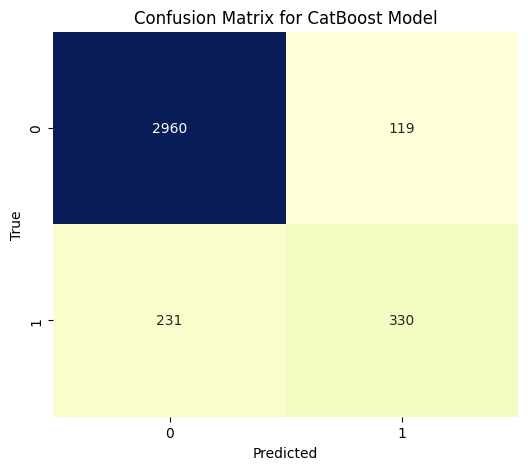

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_cb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title("Confusion Matrix for CatBoost Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## 10 . Explainable AI

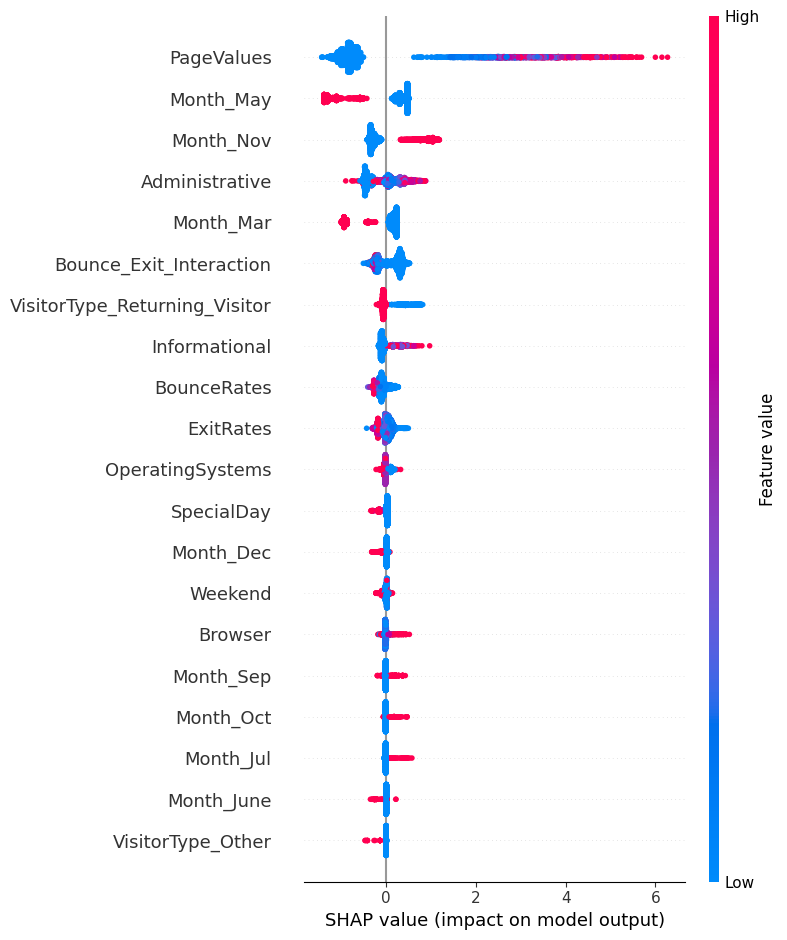

In [ ]:
import shap

# Create SHAP explainer for CatBoost
explainer_catboost = shap.TreeExplainer(best_cb)
shap_values_catboost = explainer_catboost.shap_values(X_test_rfe)

# Summary plot to visualize feature importance
shap.summary_plot(shap_values_catboost, X_test_rfe, feature_names=X.columns[selector.support_])


In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Create LIME explainer
explainer_gb = LimeTabularExplainer(
    X_train_rfe,
    training_labels=y_train,
    mode='classification',
    feature_names=X.columns[selector.support_],
    class_names=['False', 'True'],
    discretize_continuous=True
)

i = 10  # Index of the instance to explain
exp_gb = explainer_gb.explain_instance(X_test_rfe[i], classifiers["Gradient Boosting"].predict_proba)

# Visualize the explanation
exp_gb.show_in_notebook(show_table=True, show_all=False)



## 11. Data Visualization:
o Create meaningful visualizations (e.g., histograms, box plots, bar charts) to 
summarize the key findings from your EDA. Explain the insights gained from 
these visualizations.


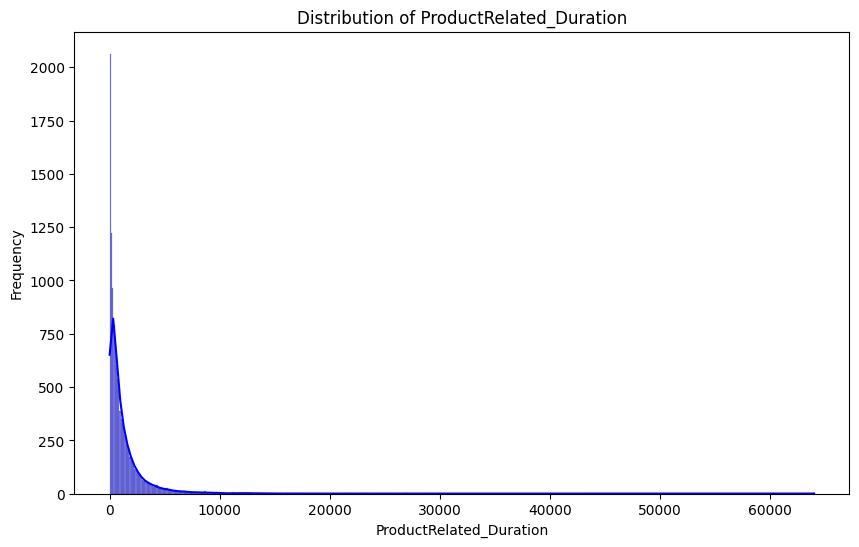

C:\Users\Georg\AppData\Local\Temp\ipykernel_9156\1595195786.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Revenue', y='BounceRates', palette='Set3')


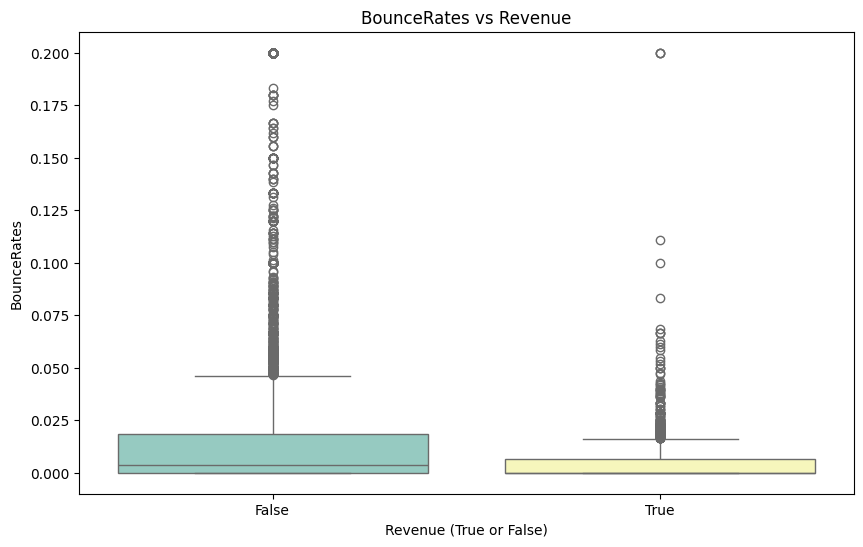

C:\Users\Georg\AppData\Local\Temp\ipykernel_9156\1595195786.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='VisitorType', palette='Set2')


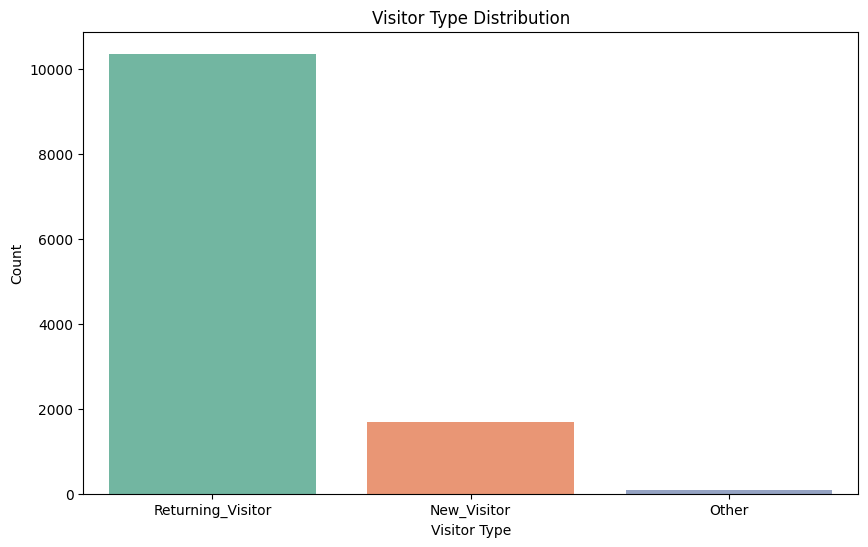

C:\Users\Georg\AppData\Local\Temp\ipykernel_9156\1595195786.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Month', palette='Set2')


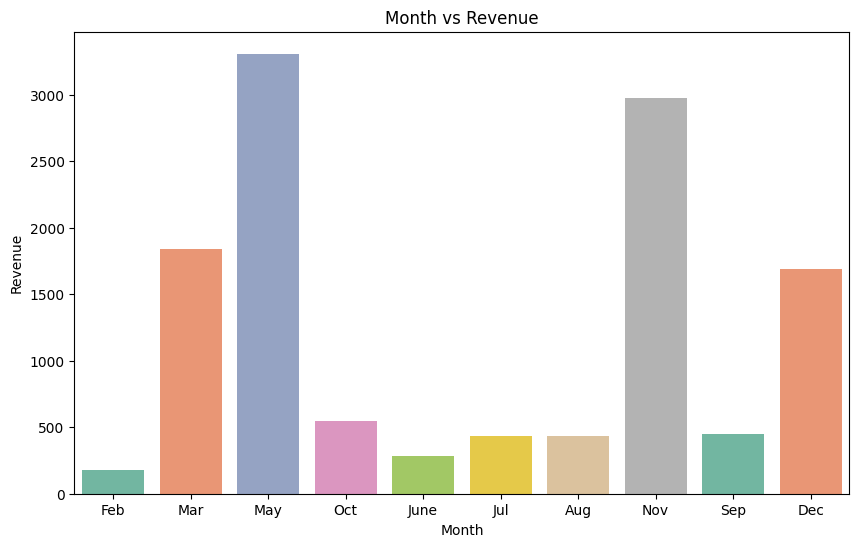

C:\Users\Georg\AppData\Local\Temp\ipykernel_9156\1595195786.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Weekend', palette='Set2')


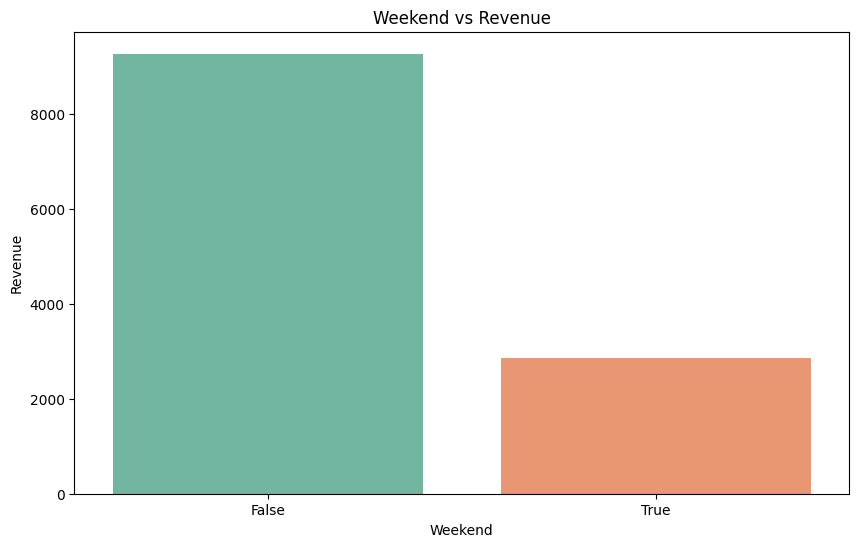

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ProductRelated_Duration'], kde=True, color='blue')
plt.title('Distribution of ProductRelated_Duration')
plt.xlabel('ProductRelated_Duration')
plt.ylabel('Frequency')
plt.show()
# Insight: The distribution of 'ProductRelated_Duration' shows how much time users spend on product-related pages. 
# A right-skewed distribution might indicate that most users spend a short amount of time, with a few spending significantly longer.

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Revenue', y='BounceRates', palette='Set3')
plt.title('BounceRates vs Revenue')
plt.xlabel('Revenue (True or False)')
plt.ylabel('BounceRates')
plt.show()
# Insight: The box plot of 'BounceRates' against 'Revenue' helps identify if there's a significant difference in bounce rates 
# between sessions that resulted in revenue and those that did not. Higher bounce rates might correlate with no revenue.

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='VisitorType', palette='Set2')
plt.title('Visitor Type Distribution')
plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.show()
# Insight: The count plot of 'VisitorType' shows the distribution of different types of visitors (e.g., new vs. returning). 
# This can help understand the proportion of new visitors compared to returning visitors.

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', palette='Set2')
plt.title('Month vs Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()
# Insight: The count plot of 'Month' shows the distribution of revenue across different months. 
# This can help identify any seasonal trends or patterns in revenue generation.

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Weekend', palette='Set2')
plt.title('Weekend vs Revenue')
plt.xlabel('Weekend')
plt.ylabel('Revenue')
plt.show()
# Insight: The count plot of 'Weekend' shows the distribution of revenue between weekends and weekdays. 
# This can help understand if there is a significant difference in revenue generation on weekends compared to weekdays.



## 9. Summary and Insights:
o Summarize the key findings from your data preprocessing and EDA. Discuss 
how these findings will influence your approach to building a machine 
learning model on this dataset

o Suggest any further steps or considerations that should be taken before 
proceeding to model building for my dataset

# Summary and Insights
Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

## Key Findings from Data Preprocessing and EDA:
- **Missing Values**: Both textual and numeric missing values were present and handled using mean and mode imputation.
- **Duplicates**: 125 duplicate rows were identified and removed.
- **Outliers**: Significant outliers were detected and removed to reduce noise and overfitting.
- **Normalization**: Numeric features were standardized to bring them to a common scale.
- **Categorical Encoding**: Categorical features were converted to numerical using one-hot encoding, increasing the number of columns.
- **Feature Engineering**: New features like `Avg_Admin_Time_Per_Page`, `Avg_Product_Time_Per_Page`, and `Bounce_Exit_Interaction` were created to capture more complex relationships.
- **EDA**: Univariate and bivariate analyses were performed to understand feature distributions and relationships.

## Influence on Model Building:
- **Data Quality**: Improved data quality through imputation, duplicate removal, and outlier handling will enhance model performance.
- **Feature Scaling**: Standardization ensures that features contribute equally to the model.
- **Categorical Encoding**: One-hot encoding makes the data suitable for machine learning algorithms.
- **New Features**: Engineered features may provide additional predictive power.
